# Assignment 4- Network Science
## Communities and Random Networks

Importing the libraries-

In [1]:
import networkx as nx                           #for network analysis
import numpy as np                              #for mathematical analysis
import matplotlib.pyplot as plt                 #for visualization
import seaborn as sns                           #for visualization
import scipy.stats as sp                        #for statistical functions
import networkx.algorithms.community as nxcom   #library for finding communities

#### A04.1- Community Detection

Step 1: Importing the Datasets

Provided to us are three datasets for the Task 1, namely-
1. Dolphins Network: Nodes represent dolphins and Edges represent frequent associations observed among a group of 62 individuals.
2. Facebook Network: Nodes represent Facebook users and Edges represent their friendship relations collected from survey participants.
3. Karate Network: Nodes represent members of the club and Edges represent a tie between two members.

In [2]:
#importing the datasets
dolphins=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data (2)\\data\\graph_dolphins.gml")
facebook=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data (2)\\data\\graph_facebook.gml")
karate=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data (2)\\data\\graph_karate.gml")

In this task I will be finding the communities within the network by using two algorithms- The Greedy Modularity Maximization and the label propagation algorithm. First, I will write a function that assigns a community a different color and draws the network with color visualized communities. Next I will generalize the algorithms of finding and visualizing the greedy modularity communities and label propagation communities for a network.

In [3]:
#writing a function to plot the community graph by assigning different colors to the different communities-
def plot_graph(name_of_network,community_list,filename):
    
    color=sns.color_palette("pastel",len(community_list))               #generating a color palette for different communities
    
    i=0
    for comm in community_list:                                         #iterating over various communities in the community list
        for node in name_of_network.nodes:                              #iterating over all the nodes in the network
            if node in list(comm):                                      #identifying the community for the node
                name_of_network.nodes[node]['color']=color[i]           #assigning community color label to the node
        i+=1                                                            #iterating over the community colors
      
    plt.figure(figsize=(10,10))                                         #defining a plot
    nx.draw(name_of_network,with_labels=True,node_color=[name_of_network.nodes[node]['color'] for node in name_of_network.nodes()])        #drawing the network using networkx
    plt.title("Community Plot for a network of "+filename)              #giving a title to the plot
    plt.show()                                                          #function to display the plot

In [4]:
#writing a function to find communities using greedy modularity maximization-
def greedy_modularity(name_of_network,filename):
    
    #randomzing the network
    name_of_random_network=nx.algorithms.smallworld.random_reference(name_of_network,niter=3,connectivity=False)
    
    #use the greedy modularity algorithm for real network-
    greedy_comm_real=nxcom.greedy_modularity_communities(name_of_network)
    #use greedy modularity algorithm for random network-
    greedy_comm_random=nxcom.greedy_modularity_communities(name_of_random_network)
    
    #plotting the community graph
    plot_graph(name_of_network,greedy_comm_real,filename+" real using greedy modularity")                  #plotting the real network communities
    #printing the output of number of communities obtained for the real network
    print("The total number of communities obtained by using greedy modularity method for real network of "+filename+" is {}".format(len(greedy_comm_real)))  
    
    plot_graph(name_of_random_network,greedy_comm_random,filename+" random using greedy modularity")        #plotting for random network communities
    #printing the output of number of communities obtained for the random network
    print("The total number of communities obtained by using greedy modularity method for random network of "+filename+" is {}".format(len(greedy_comm_random)))

Calling the functions above for the networks given-

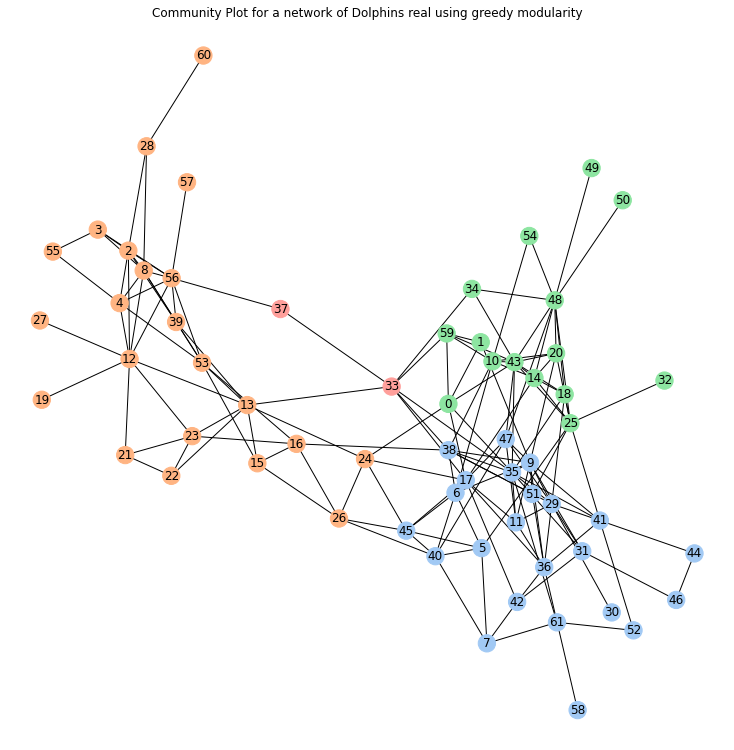

The total number of communities obtained by using greedy modularity method for real network of Dolphins is 4


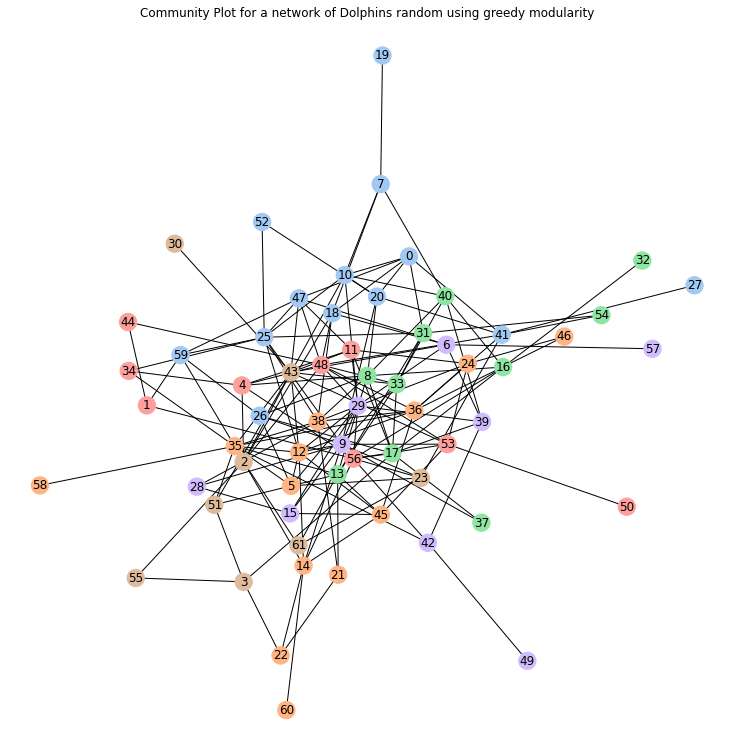

The total number of communities obtained by using greedy modularity method for random network of Dolphins is 6


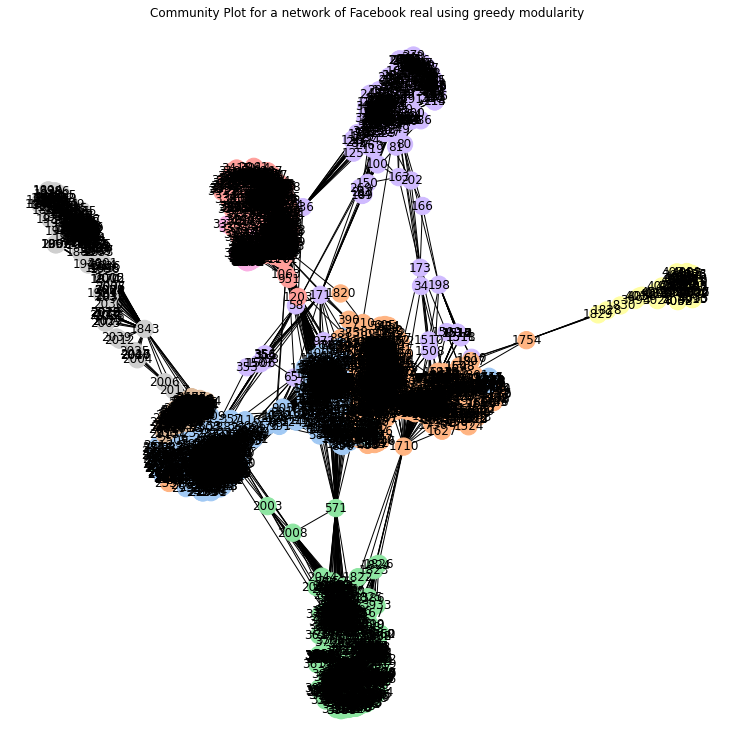

The total number of communities obtained by using greedy modularity method for real network of Facebook is 13


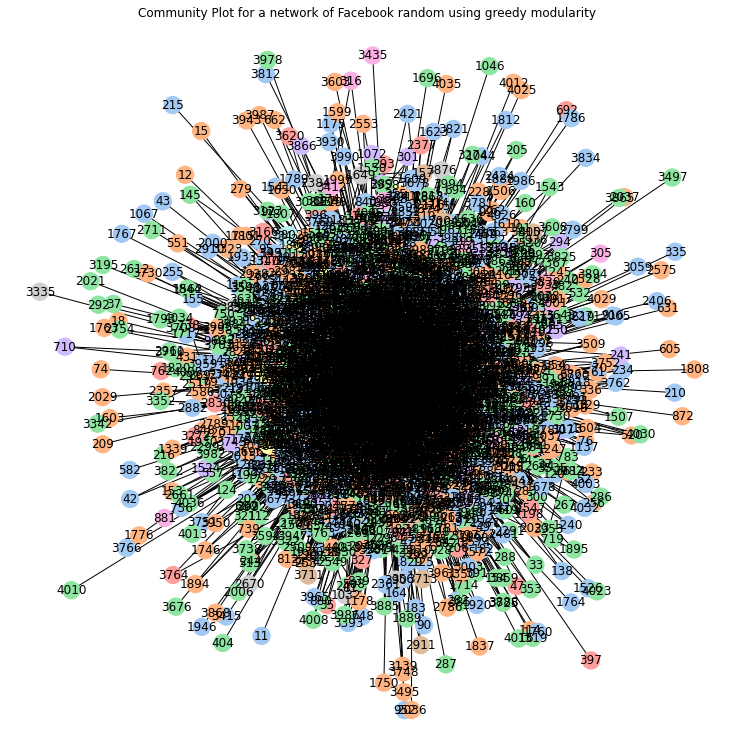

The total number of communities obtained by using greedy modularity method for random network of Facebook is 19


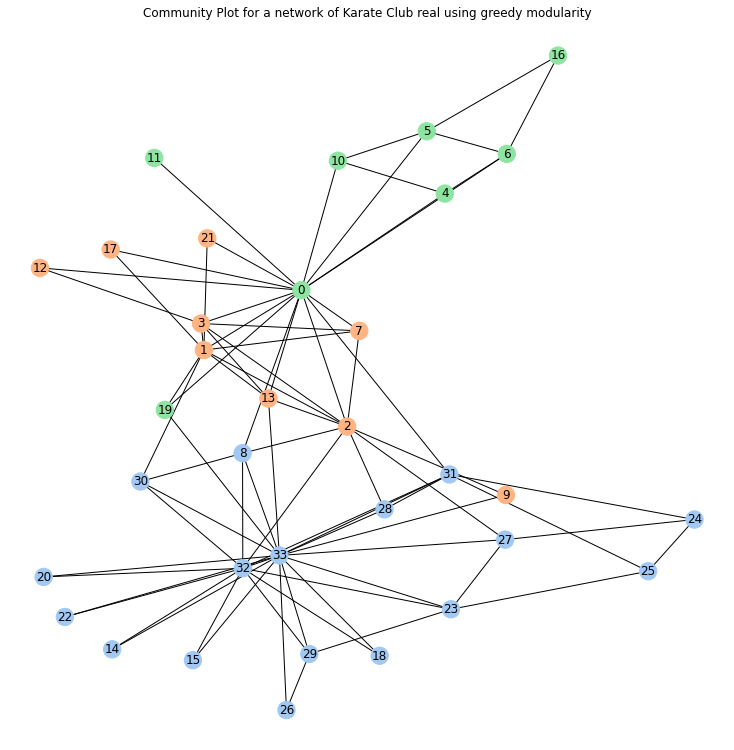

The total number of communities obtained by using greedy modularity method for real network of Karate Club is 3


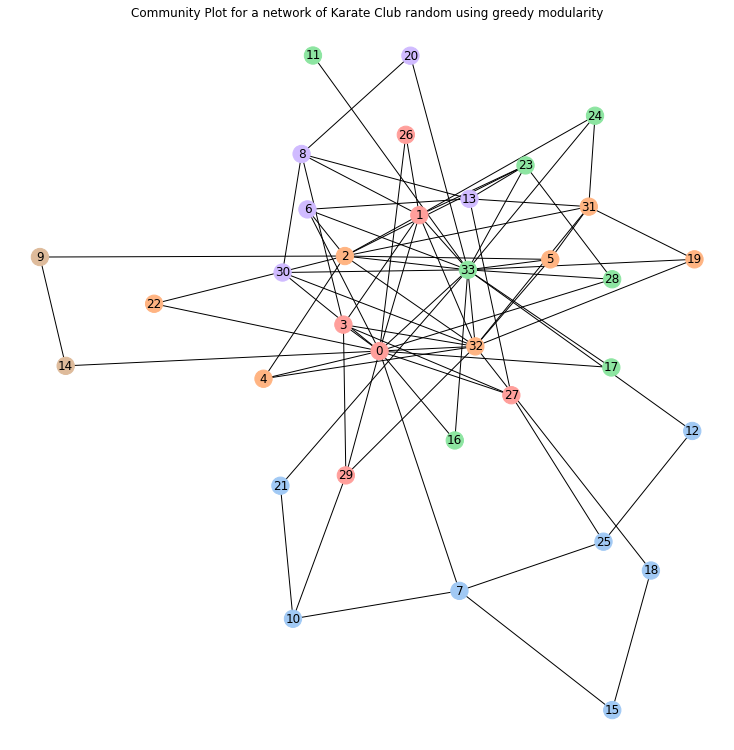

The total number of communities obtained by using greedy modularity method for random network of Karate Club is 6


In [5]:
greedy_modularity(dolphins,"Dolphins")
greedy_modularity(facebook,"Facebook")
greedy_modularity(karate,"Karate Club")

In [6]:
#writing a function to find communities using label propagation algorithm-
def label_prop(name_of_network,filename):
    
    #randomizing the network
    name_of_random_network=nx.algorithms.smallworld.random_reference(name_of_network,niter=3,connectivity=False)
    
    #use the label propagation algorithm for real network-
    label_prop_real=[comm for comm in nxcom.label_propagation_communities(name_of_network)]
    #use the label propagation algorithm for random network-
    label_prop_random=[comm for comm in nxcom.label_propagation_communities(name_of_random_network)]
    
    #plotting the community graph for real network-
    plot_graph(name_of_network,label_prop_real,filename+" real using label propagation")
    #printing the output of number of communities obtained for real network
    print("The total number of communities obtained by using label propagation method for real network of "+filename+" is {}".format(len(label_prop_real)))
    
    #plotting the community graph for random network-
    plot_graph(name_of_random_network,label_prop_random,filename+" random using label propagation")
    #printing the output of number of communities obtained for random network
    print("The total number of communities obtained by using label propagation method for random network of "+filename+" is {}".format(len(label_prop_random)))

Using the label propagation function to find the communities in the dataset-

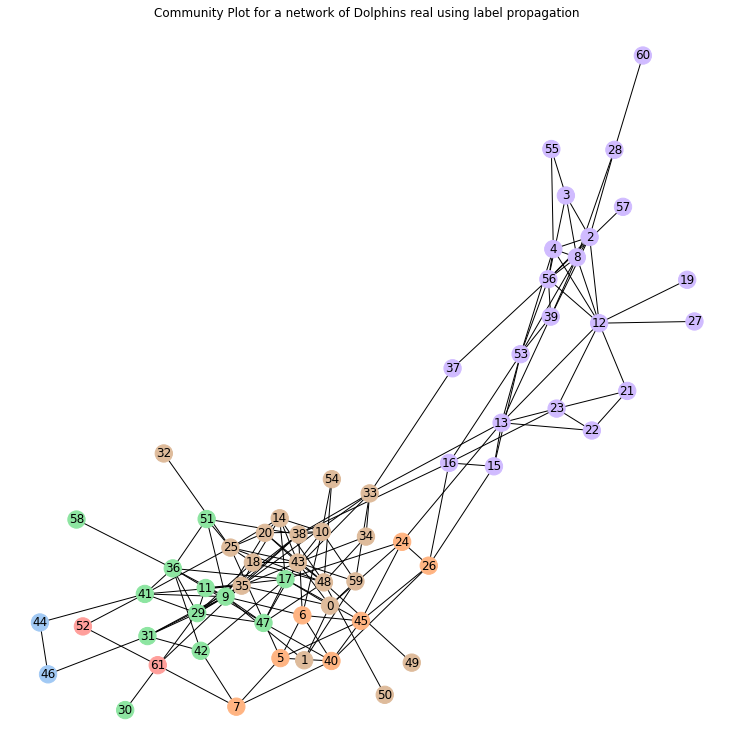

The total number of communities obtained by using label propagation method for real network of Dolphins is 6


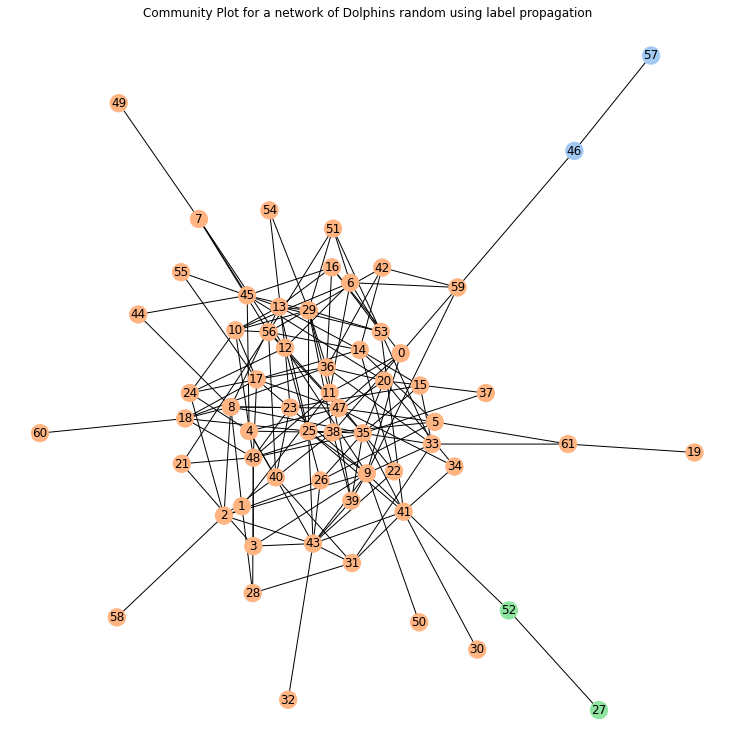

The total number of communities obtained by using label propagation method for random network of Dolphins is 3


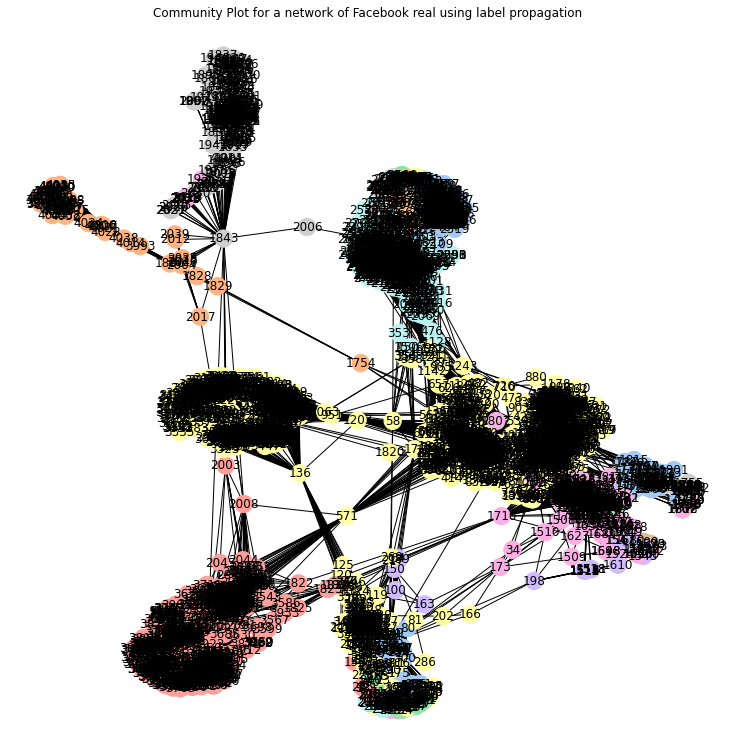

The total number of communities obtained by using label propagation method for real network of Facebook is 44


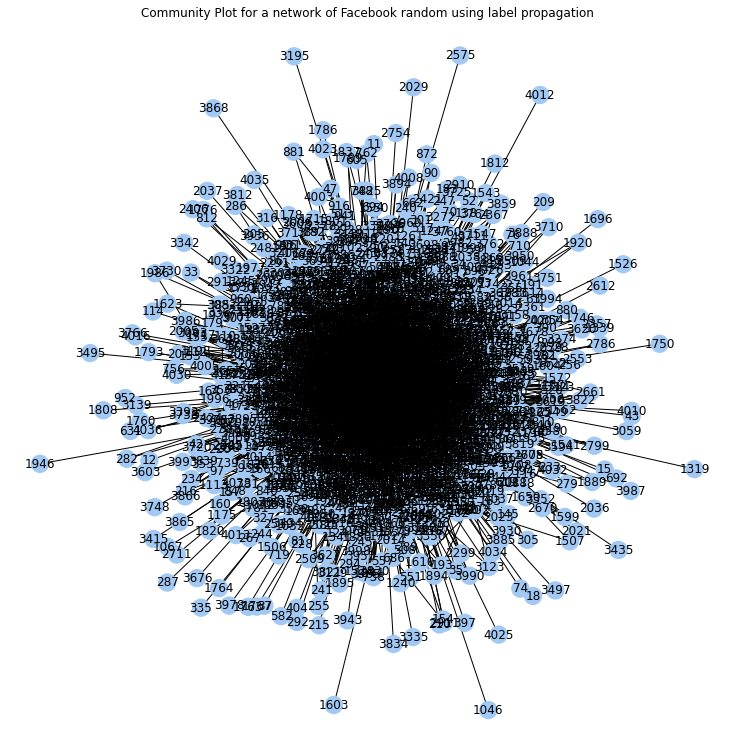

The total number of communities obtained by using label propagation method for random network of Facebook is 1


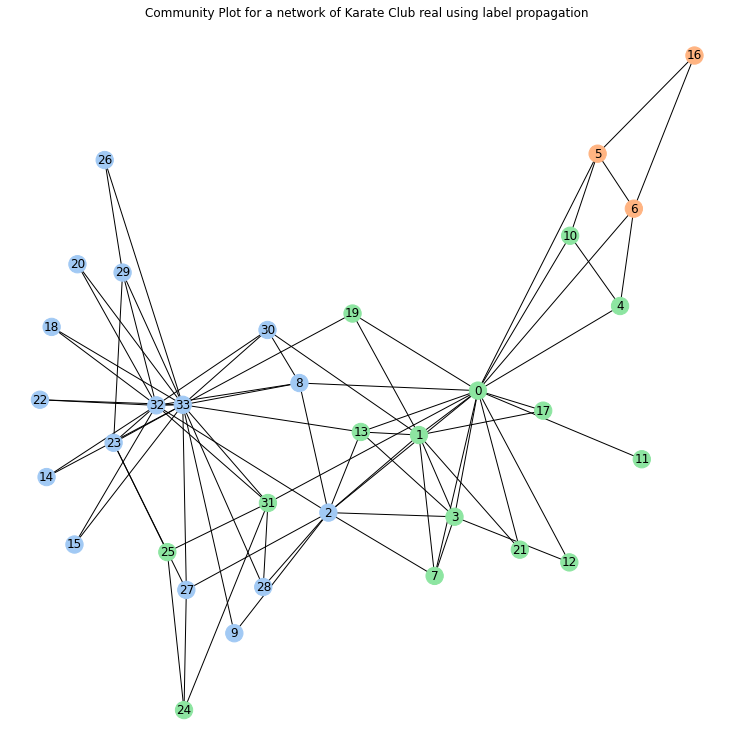

The total number of communities obtained by using label propagation method for real network of Karate Club is 3


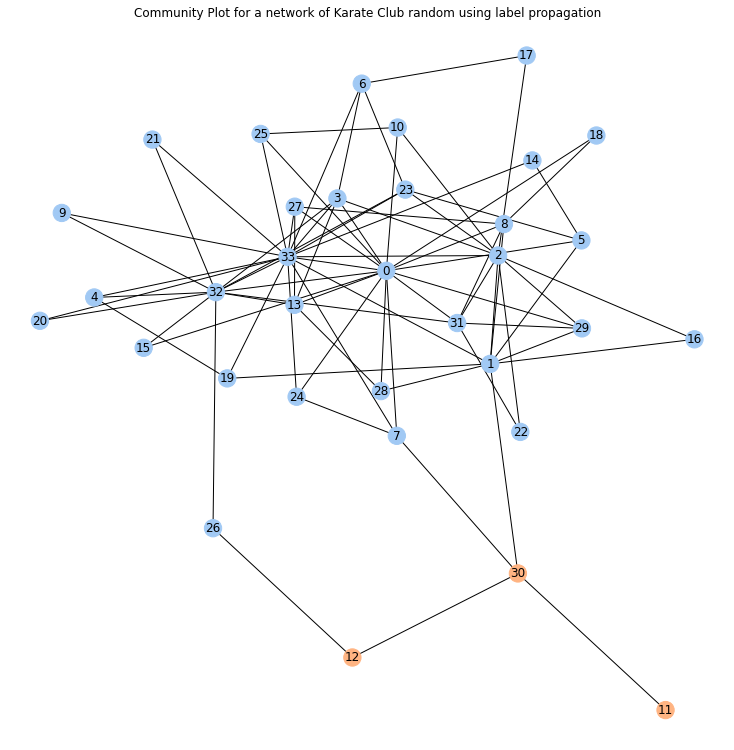

The total number of communities obtained by using label propagation method for random network of Karate Club is 2


In [7]:
label_prop(dolphins,"Dolphins")
label_prop(facebook,"Facebook")
label_prop(karate,"Karate Club")

Observations-
1. The greedy modularity community maximization algorithm gives lesser communities than the label propagation algorithm for real networks.
2. The number of communities increase upon randomizing the network when found using the greedy modularity maximaization algorithm.
3. The number of communities decrease upon randomizing the network when found using the label propagation algorithm.

##### A04.2 Erdos-Renyi random networks

In this question, I will write a function to generate Erdos Renyi Random networks with a fixed number of nodes and different average degree of networks. 

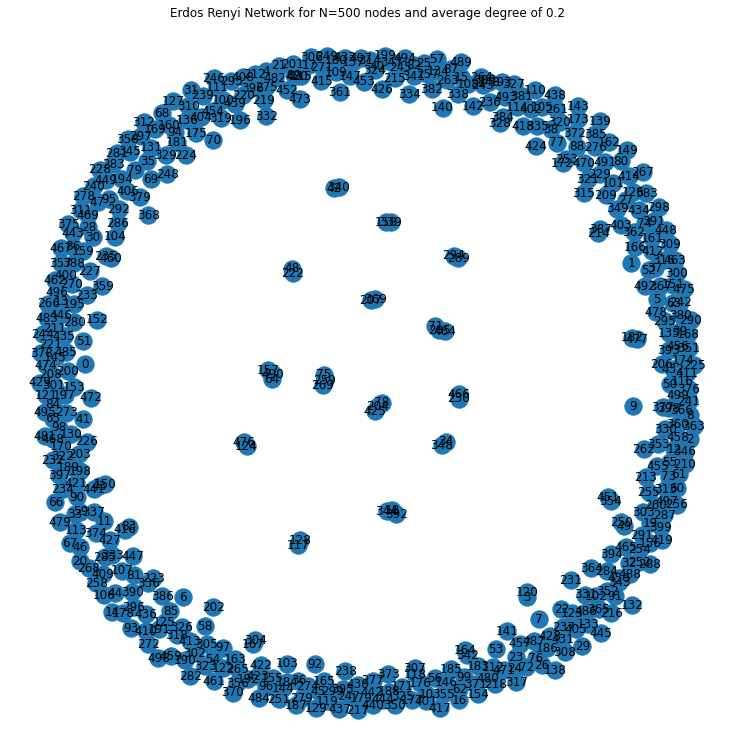

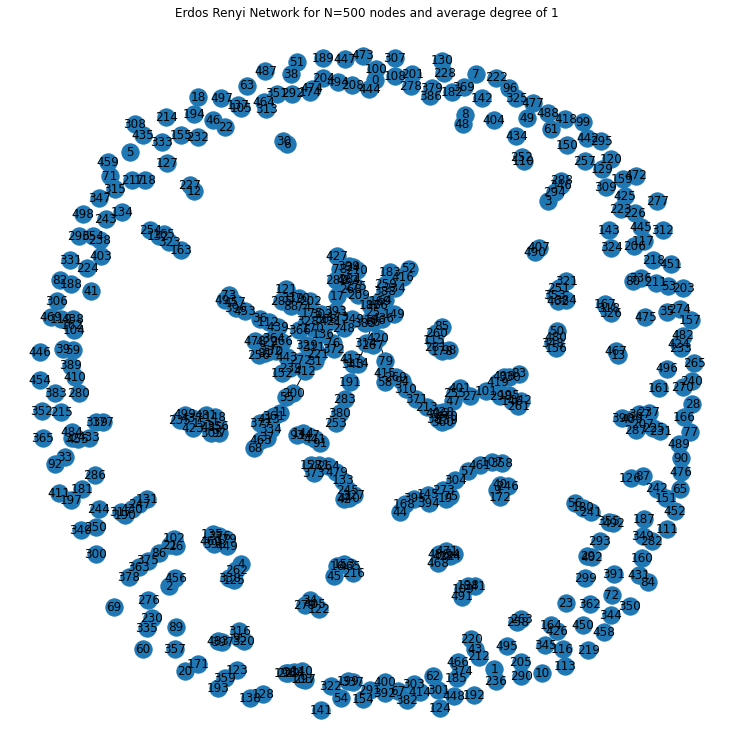

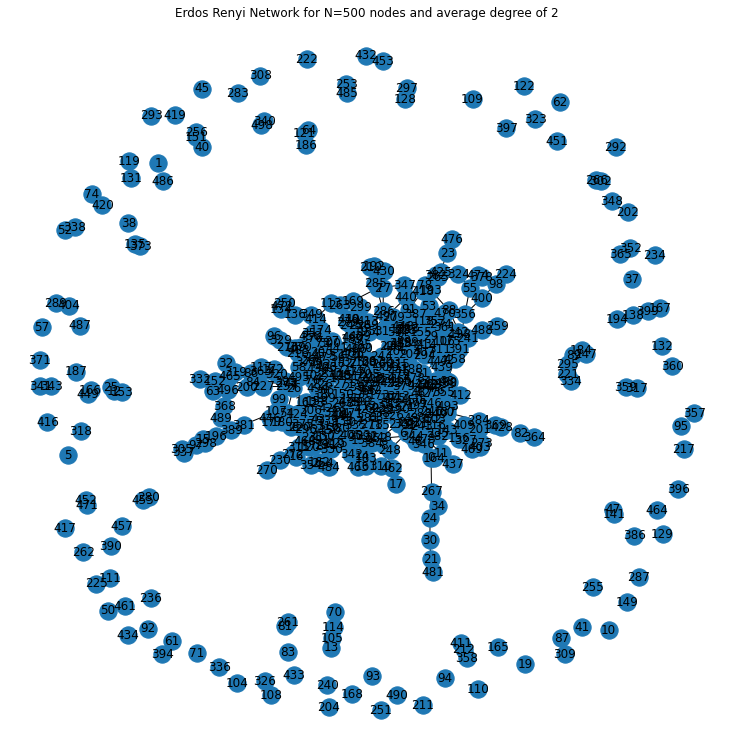

In [8]:
avg_k=[0.2,1,2]                      #list of average degree for network
N=500                                #number of nodes

#generating Erdos Renyi Networks for 500 nodes-
for avg_degree in avg_k:                                      #iterating over the average degree list
    p=avg_degree/(N-1)                                        #calculating the probability of edge creation for nodes of the network
    er_network=nx.erdos_renyi_graph(N,p)                      #function to create an Erdos Renyi Random graph
    plt.figure(figsize=(10,10))                               #initializing the plot and displaying its size
    nx.draw(er_network,pos=nx.spring_layout(er_network),with_labels=True)                             #drawing the network
    plt.title("Erdos Renyi Network for N=500 nodes and average degree of {}".format(avg_degree))      #title to the graph 
    plt.show()                                                                                        #display of the network

Next I will create a similar networks for N=100 nodes but different probaility values-

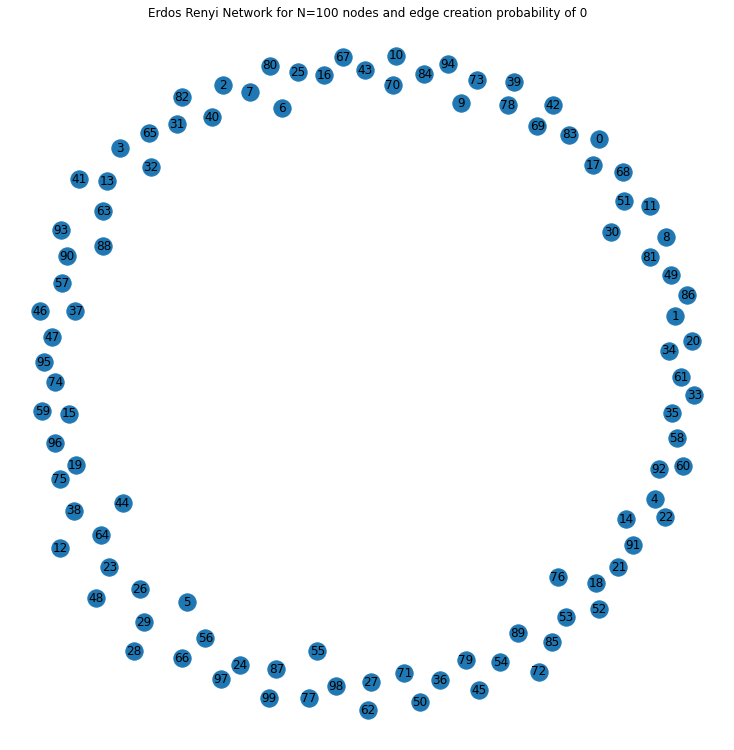

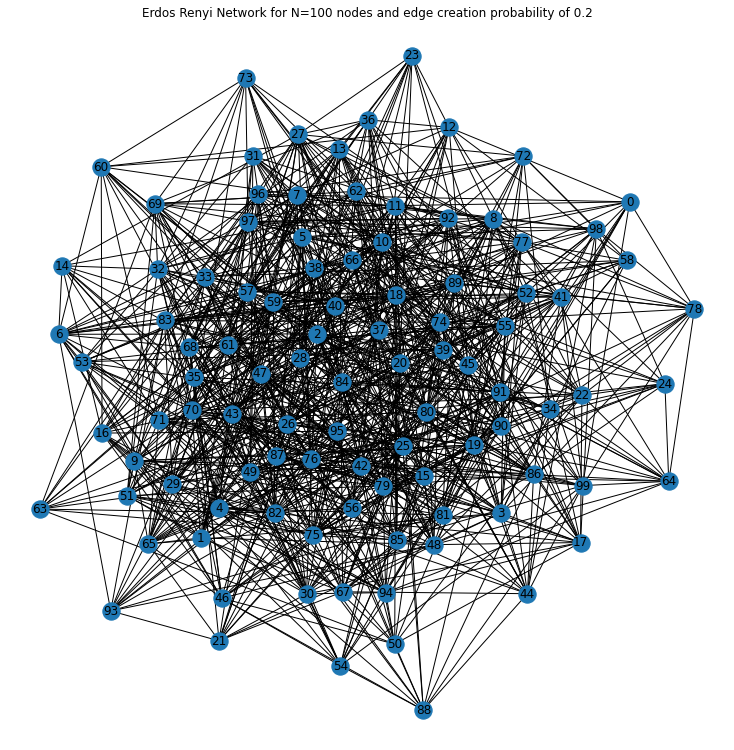

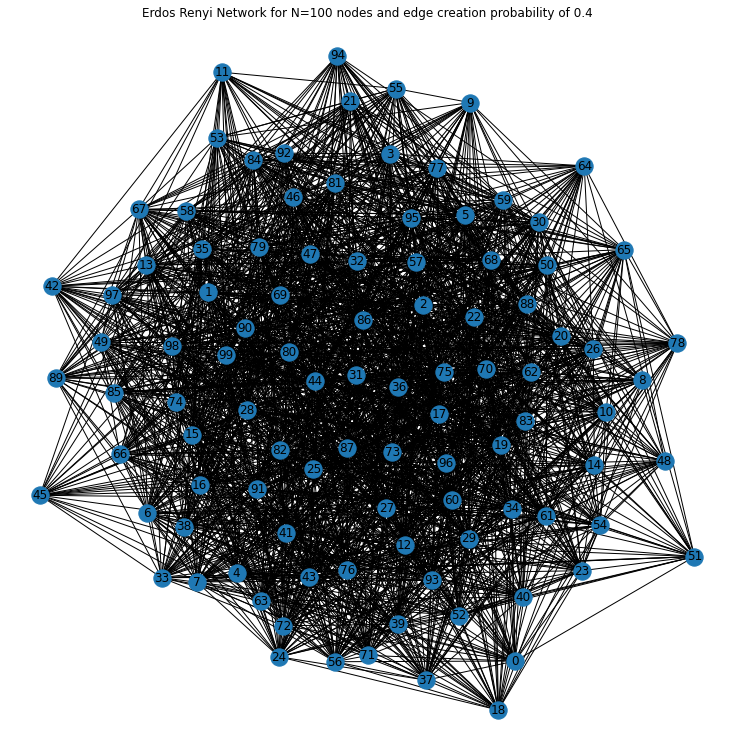

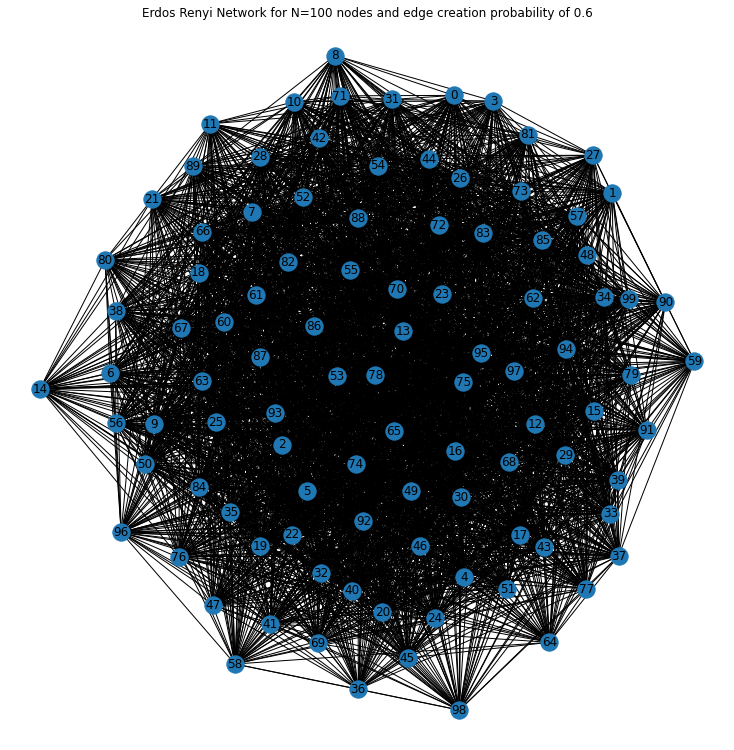

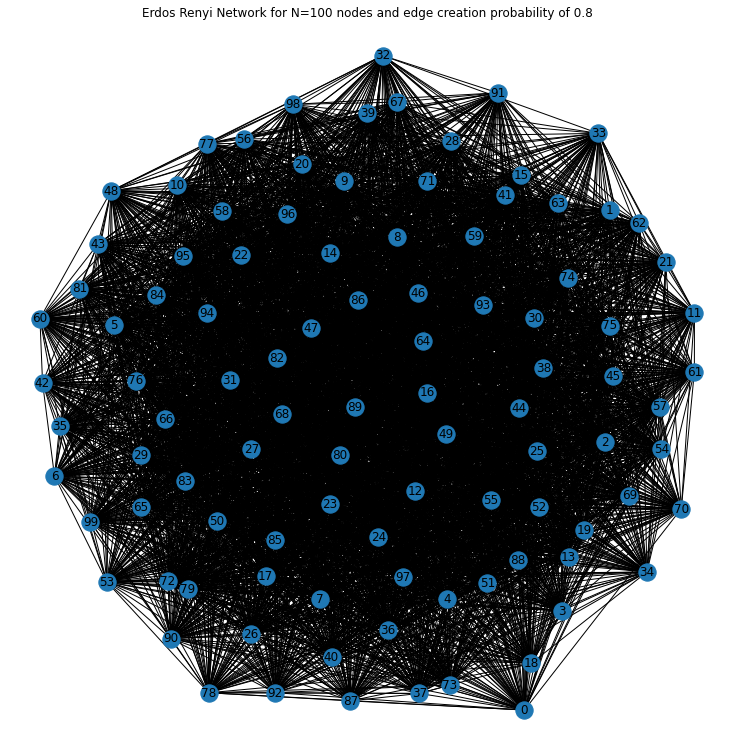

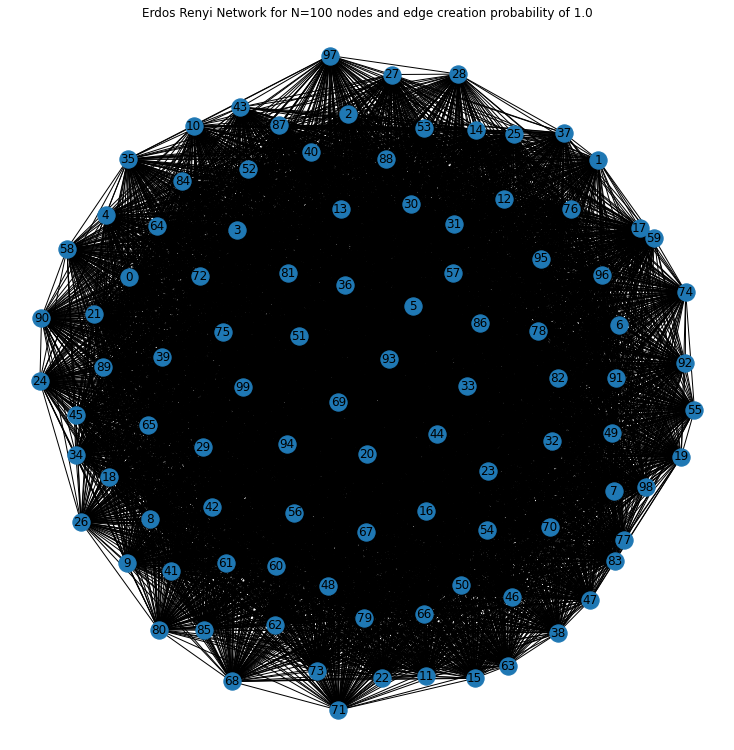

In [9]:
prob=[0,0.2,0.4,0.6,0.8,1.0]                               #list of different probabilities of edge formation                                
N=100                                                      #total number of nodes

#generating Erdos Renyi Networks for 100 nodes-
for p in prob:                                             #iterating over the probability list
    er_network=nx.erdos_renyi_graph(N,p)                   #making a network
    plt.figure(figsize=(10,10))                            #initializing the plot size
    nx.draw(er_network,pos=nx.spring_layout(er_network),with_labels=True)                  #drawing the network graph
    plt.title("Erdos Renyi Network for N=100 nodes and edge creation probability of {}".format(p))  #adding a title to the graph
    plt.show()                                                                             #displaying the graph

As observed, as the greater the average degree of the network, the wider the clustering of the random network. Also, as the probability of edge creation is increased, a more dense graph is obtained. 

In the upcoming part, I will calculate the probability that a node belongs to the largest connected component 𝑁𝐺/𝑁 as a function of 𝑝 and plot the graph. I will also label the critical probability on the same graph. Additionally I will also plot the average clustering of the random network as a function of probability.

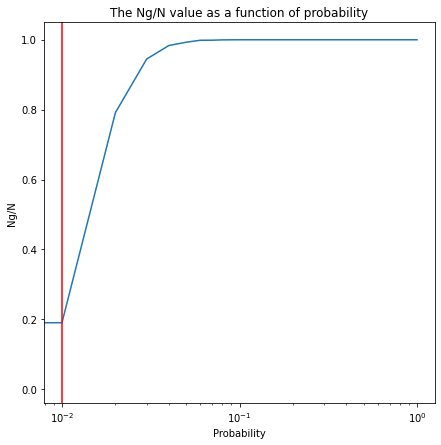

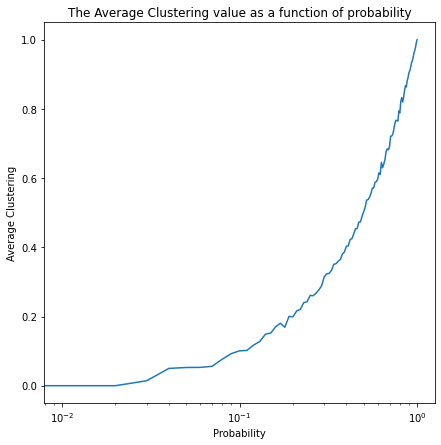

In [10]:
#function for plotting the Ng/N and average clustering graphs as a function of probability for the Erdos Renyi Random Network
step=0.01                                                                  #setting an initial step    
prob=np.arange(0,1.01,step)                                                #making a list of probabilities 
ng_n=[]                                                                    #initializing a list of Ng/N values
avg_clustering=[]                                                          #initalizing a list of average probabilities
for p in prob:                                                             #iterating over the probability list
    ng_n_network=[]                                                        #initializing a list for Ng/N values at same probability
    for i in range(1,100):                                                 #iterating over 1-100, to generate a total 100 ER graphs
        er_network=nx.erdos_renyi_graph(100,p)                             #generating ER graphs of 100 nodes
        components = [c for c in nx.connected_components(er_network)]      #getting the connected components of the ER network
        maxcomp = max(components, key=len)                                 #getting the component with maximum edges 
        p_Ng_N = len(maxcomp)/er_network.number_of_nodes()                 #calculating the Ng/N for the ER graph generated
        ng_n_network.append(p_Ng_N)                                        #appending the Ng/N for same probability list
        

    ng_n.append(np.mean(ng_n_network))                                     #appending the Ng/N main list with mean of the values obtained at the same probability
    avg_clustering.append(nx.average_clustering(er_network))               #finding the average clustering for the network at the probability and appending the value to the list

p_critical=1/100                                                           #calculating the critical probability

#plotting the graph for Ng/N as a function of 'p'
plt.figure(figsize=(7,7))                                                  #initializing the figure size
plt.plot(prob,ng_n)                                                        #plotting the graph
plt.axvline(p_critical,color="Red")                                        #adding a line depicting the critical probabilty
plt.xscale("log")                                                          #adding a log scale to the x axis
plt.xlabel("Probability")                                                  #labelling the x axis
plt.ylabel("Ng/N")                                                         #labelling the y axis
plt.title("The Ng/N value as a function of probability")                   #adding a title to the plot
plt.show()                                                                 #displaying the plot

#plotting the graph for Average Clustering as a function of 'p'
plt.figure(figsize=(7,7))                                                  #initializing the figure size
plt.plot(prob,avg_clustering)                                              #plotting the graph
plt.xscale("log")                                                          #adding a log scale to the x axis
plt.xlabel("Probability")                                                  #labelling the x axis
plt.ylabel("Average Clustering")                                           #labelling the y axis
plt.title("The Average Clustering value as a function of probability")     #adding a title to the plot
plt.show()                                                                 #displaying the plot

Observations-
1. The values of the probability that the node belongs to the largest connected component (Ng/N) starts increasing exponentially as it crosses the threshold critical probability to ultimately reach a saturation of 1.0.
2. As the probability of node formation increases in a random network, so does the average clustering values. Infact, the average clustering coefficient values increase exponentially with increasing values of probability. This means more tightly aggregated clusters arise as the probability of edge formation increases for the nodes of a random network.

#### A04.3 Small-world with high clustering

In the next part of this assignment, I will be generating WS small world networks with N=100 nodes and plotting their average clustering and shortest path length values as a function of probability of edge formation for a node in the network.

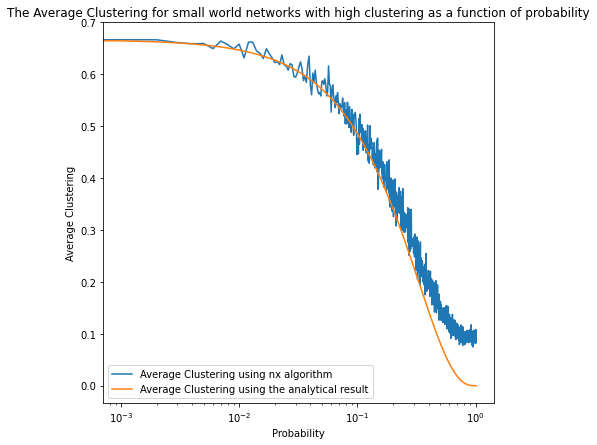

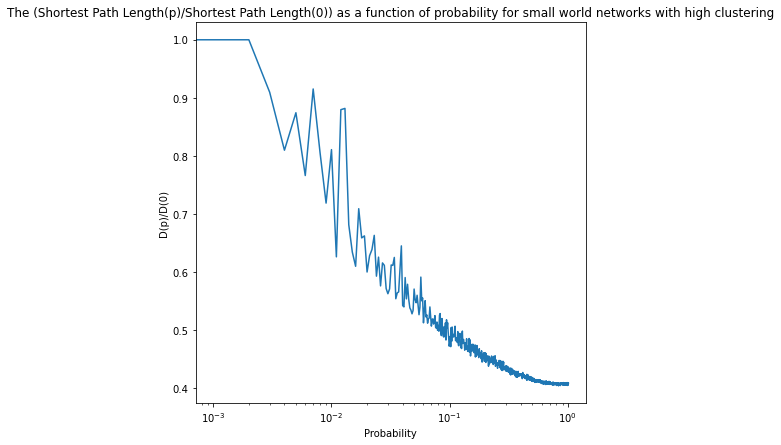

In [11]:
N=100                                                              #initializing the total number of nodes
step=0.001                                                         #initializing the step
prob=np.arange(0,1.01,step)                                        #making a list of probabilities
k=5                                                                #initializing and fixing the k values
Cp=[]                                                              #initializing the list for average clustering values obtained by the nx algorithm
Cp_analytical=[]                                                   #initializing the list for average clustering values obtained analytically
shortest_path_length=[]                                            #initializing the shortest path length list

for p in prob:                                                     #iterating over the probability list
    small_world_graph=nx.watts_strogatz_graph(100,10,p)            #making the small world graphs for the value of probability
    Cp.append(nx.average_clustering(small_world_graph))            #appending the average clustering value for the graph to the list
    if p==0:                                                       #setting a condition for probability value
        PL0=nx.average_shortest_path_length(small_world_graph)     #finding the shortest path length at p=0 
        shortest_path_length.append(1)                             #appending the D(p)/D(0) value to the shortest path length list at p=0
    else:
        PL=nx.average_shortest_path_length(small_world_graph)      #finding the shortest path length at the probability
        shortest_path_length.append(PL/PL0)                        #appending the D(p)/D(0) value to the shortest path length list
        
    Cp_analytical.append((3*(k-1))/(2*(2*k-1))*pow(1-p,3))         #finding the analytical solution to the average clustering and appending it to the list
    
#plotting average clustering (algorithm and analytical) as a function of probability
plt.figure(figsize=(7,7))                                                                      #initializing the figure size
line1,=plt.plot(prob,Cp,label="Average Clustering using nx algorithm")                         #adding the average clustering from nx algorithm to the plot
line2,=plt.plot(prob,Cp_analytical,label="Average Clustering using the analytical result")     #adding the average clustering obtained analytically to the plot
plt.legend()                                                                                   #displaying the legend for identification
plt.xscale("log")                                                                              #setting the x scale to log
plt.xlabel("Probability")                                                                      #labelling the x axis
plt.ylabel("Average Clustering")                                                               #labelling the y axis
plt.title("The Average Clustering for small world networks with high clustering as a function of probability")     #title to the plot
plt.show()                                                                                     #displaying the graph

#plotting for D(P)/D(0) as a function of probability
plt.figure(figsize=(7,7))                                                                      #initializing the figure size
plt.plot(prob,shortest_path_length)                                                            #adding the graph
plt.xscale("log")                                                                              #setting the x scale to log
plt.xlabel("Probability")                                                                      #labelling the x axis
plt.ylabel("D(p)/D(0)")                                                                        #labelling the y axis
plt.title("The (Shortest Path Length(p)/Shortest Path Length(0)) as a function of probability for small world networks with high clustering")
plt.show()                                                                                     #displaying the graph

Observations-
1. The average clustering of a small world network with high clustering density decreases with increasing probability.
2. The analytical solution for calculating the average density goes well for low probability values but deviates for high probability values. 
3. The D(p)/D(0) values decreases as probability values increase.